In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Número de amostras extraídas do processo X(k)
M = 10 ** 5

# Propriedades do ruído aditivo
avg_n = 0
var_n = 0.02
sig_n = np.sqrt(var_n)

# Universo de símbolos do processo S(k)
symbols_S = (-1, 1)

In [3]:
s = np.random.choice(symbols_S, M + 1)
n = np.random.normal(avg_n, sig_n, M + 1)

In [4]:
x = np.ndarray(M + 1)

# Forma "imediata" de construir as amostras do processo X(k)
# for i in range(1, M + 1):
#     x[i] = s[i] + 0.5 * s[i - 1] + n[i]

x = s + n
x[1:] += 0.5 * s[:-1]
    
# Desconsiderar a amostra inicial de X(k), que não é definida da forma como deveria ser,
# por não haver uma amostra passada s(k-1)
x = x[1:]

### Propriedades de X(k):

In [5]:
print(f"Média temporal de X(k): {x.mean():.5f}")
print(f"Variância temporal de X(k): {x.var():.5f}")

Média temporal de X(k): -0.00417
Variância temporal de X(k): 1.27336


### Estimativas da autocorrelação de X(k):
Pandas Series permitem fazer deslocamentos unitários e operações com valores nulos mais facilmente.
Em resumo, a célula abaixo estima a autocorrelação para todas as amostras obtidas de X(k), com lags
variando de 0 a M / 2.

In [6]:
series_x = pd.Series(x)
r = np.array([(series_x * series_x.shift(j)).mean() for j in range(M//2)])

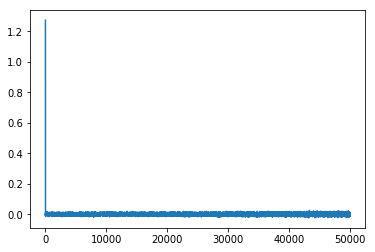

In [7]:
plt.plot(r)

### Matriz de Autocorrelação do processo X(k) ($\mathbf{R}_{X}$)

In [8]:
Rx = np.array([
    [r[0], r[1], r[2]],
    [r[1], r[0], r[1]],
    [r[2], r[1], r[0]]
])
print(Rx)

[[1.27337237 0.50846699 0.01370839]
 [0.50846699 1.27337237 0.50846699]
 [0.01370839 0.50846699 1.27337237]]


### Vetor de Correlação Cruzada ($\mathbf{p}_{XS}$)

In [13]:
s.shape

(100001,)

In [15]:
series_x.shape

(100000,)

In [9]:
Pxs_t = np.nanmean([s[1:] * series_x.shift(j) for j in range(-100, 100)], axis=1)

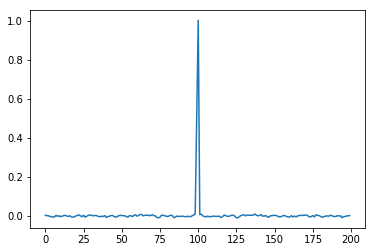

In [10]:
plt.plot(Pxs_t)

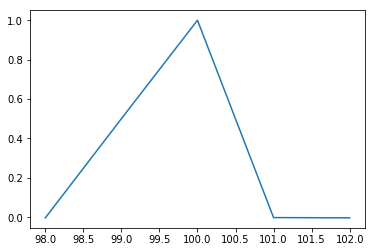

In [11]:
plt.plot(list(range(98, 103)), Pxs_t[98:103])

# Variância das estimativas acima

In [12]:
series_x = pd.Series(x)
r = np.array([(series_x * series_x.shift(j)).var() for j in range(M//2)])

### Matriz de Autocorrelação do processo X(k) ($\mathbf{R}_{X}$)

In [13]:
Rx = np.array([
    [r[0], r[1], r[2]],
    [r[1], r[0], r[1]],
    [r[2], r[1], r[0]]
])
print(Rx)

[[1.10114624 1.35948933 1.61344401]
 [1.35948933 1.10114624 1.35948933]
 [1.61344401 1.35948933 1.10114624]]


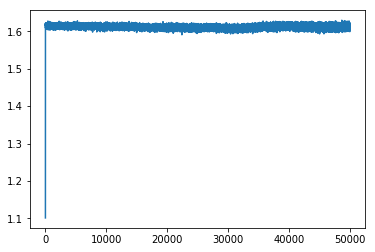

In [14]:
plt.plot(r)

### Vetor de Correlação Cruzada ($\mathbf{p}_{XS}$)

In [15]:
Pxs_t = np.nanvar([s[1:] * series_x.shift(j) for j in range(-100, 100)], axis=1)

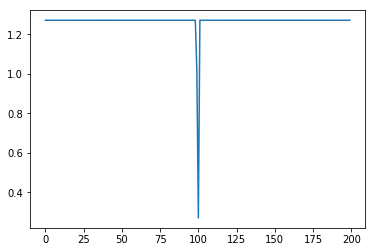

In [16]:
plt.plot(Pxs_t)